# Inference 1: Is there a correlation between audio features and song popularity?

**Matthew Gouyer: Team 2**

In [ ]:
# Notebook dataset download template by Tien
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter

# Download the latest dataset from kaggle
downloaded_path = kagglehub.dataset_download("thedevastator/spotify-tracks-genre-dataset")

# Load the dataset using dataset_load
songs = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/spotify-tracks-genre-dataset",
  "train.csv",
)

songs.head()

100%|██████████| 8.17M/8.17M [00:00<00:00, 185MB/s]

Extracting files...


Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
# outline of audio features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
songs[audio_features].head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [ ]:
# Pair audtion features and popularity column
pop_v_features = audio_features + ['popularity']
songs_pvf = songs[pop_v_features]

# handle missing values w/ a simple dropna statement
songs_pvf = songs_pvf.dropna()

display(songs_pvf.head())
songs_pvf.info()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,73
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,55
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,57
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,71
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      114000 non-null  float64
 1   energy            114000 non-null  float64
 2   loudness          114000 non-null  float64
 3   speechiness       114000 non-null  float64
 4   acousticness      114000 non-null  float64
 5   instrumentalness  114000 non-null  float64
 6   liveness          114000 non-null  float64
 7   valence           114000 non-null  float64
 8   tempo             114000 non-null  float64
 9   popularity        114000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 8.7 MB


In [ ]:
# Correaltion Analysis
# Goal is to calculate and find the linear relationship between
# 'audio_features' and 'popularity'

corr_matrix = songs_pvf.corr()

corr_matrix = corr_matrix['popularity'].drop('popularity').sort_values(ascending=0)

corr_matrix

,popularity
loudness,0.050423
danceability,0.035448
tempo,0.013205
energy,0.001056
liveness,-0.005387
acousticness,-0.025472
valence,-0.040534
speechiness,-0.044927
instrumentalness,-0.095139


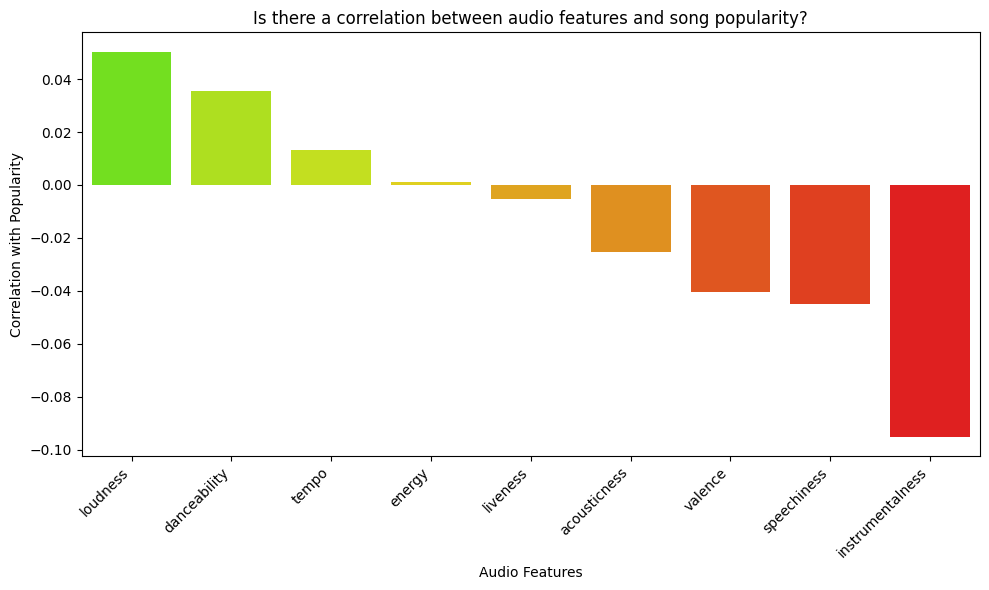

In [ ]:
# Visualization of positive negative correaltion of
# audio features vs popularity

# The bar plot shows that:
# Positive correlation: Loudness, danceability, tempo, and energy
# Negative correlation: Liveness, acousticness, valence, speechiness, instrumentalness
# Therefore songs that have loudness & danceability are more likely to be popular than songs
# with other audio features.
plt.figure(figsize=(10,6))
sns.barplot(x = corr_matrix.index, y = corr_matrix.values, hue = corr_matrix.index, palette = 'prism_r')
plt.title('Is there a correlation between audio features and song popularity?')
plt.xlabel('Audio Features')
plt.ylabel('Correlation with Popularity')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()


